In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

                       
                        
                          


/Users/kieranlockyer/anaconda2/envs/py37/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [7]:
pwd

'/Users/kieranlockyer'

In [8]:
cd

/Users/kieranlockyer


In [9]:
titanic_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")

In [121]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,21-28
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,35-42
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,21-28
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35-42
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,35-42
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,49-56
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,0-7
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,21-28
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,14-21


In [11]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
sum(pd.isnull(titanic_df['Age']))

177

In [13]:
# proportion of "Age" missing
round(177/(len(titanic_df["PassengerId"])),4)



0.1987

In [14]:
len(titanic_df["PassengerId"])

891

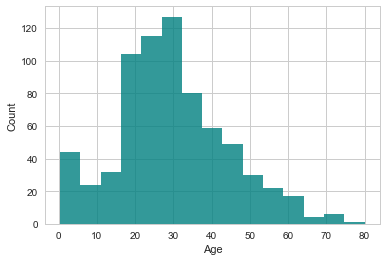

In [15]:
ax = titanic_df["Age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()


In [16]:
ax = titanic_df["Sex"].hist(bins=2, color='teal', color='red'alpha=0.8)
ax.set(xlabel='Sex', ylabel='Count')
plt.show()

SyntaxError: invalid syntax (<ipython-input-16-495d20c65079>, line 1)

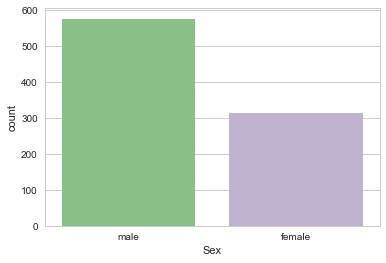

In [17]:
sns.countplot(x='Sex', data=titanic_df, palette="Accent")

In [18]:
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
titanic_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [20]:
titanic_df['Survived'].groupby(titanic_df['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

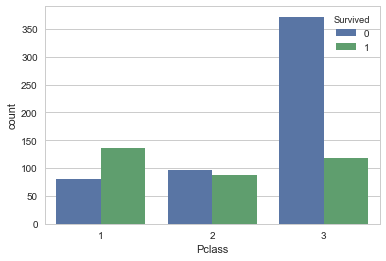

In [21]:
 ax = sns.countplot(x="Pclass", hue="Survived", data=titanic_df)

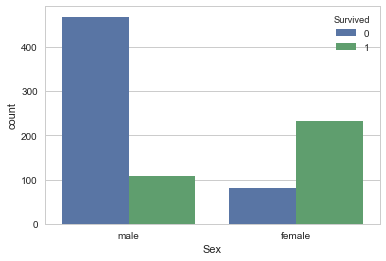

In [22]:
 ax = sns.countplot(x="Sex", hue="Survived", data=titanic_df)

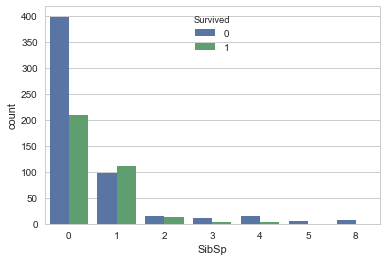

In [23]:
 ax = sns.countplot(x="SibSp", hue="Survived", data=titanic_df)

In [24]:
titanic_df['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [25]:
titanic_df['Name_Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split('.')[0])
titanic_df['Name_Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Ms                1
 Sir               1
 Jonkheer          1
 Mme               1
 Don               1
 the Countess      1
 Capt              1
 Lady              1
Name: Name_Title, dtype: int64

In [26]:
titanic_df['Survived'].groupby(titanic_df['Name_Title']).mean()

Name_Title
 Capt            0.000000
 Col             0.500000
 Don             0.000000
 Dr              0.428571
 Jonkheer        0.000000
 Lady            1.000000
 Major           0.500000
 Master          0.575000
 Miss            0.697802
 Mlle            1.000000
 Mme             1.000000
 Mr              0.156673
 Mrs             0.792000
 Ms              1.000000
 Rev             0.000000
 Sir             1.000000
 the Countess    1.000000
Name: Survived, dtype: float64

In [27]:
titanic_df['Survived'].groupby(titanic_df['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [41]:
titanic_df['Survived'].groupby(pd.cut(titanic_df['Age'],6)).mean()

Age
(0.34, 13.683]      0.591549
(13.683, 26.947]    0.354839
(26.947, 40.21]     0.428571
(40.21, 53.473]     0.390000
(53.473, 66.737]    0.348837
(66.737, 80.0]      0.142857
Name: Survived, dtype: float64

In [139]:

age_labels  = ['0-7', '7-14', '14-21', '21-28', '28-35', '35-42', '42-49', '49-56', '56-63', '63-70', '70-77', '77-84']
titanic_df['age_group'] = pd.cut(titanic_df.Age, range(0, 85, 7), right=False, labels=age_labels)




In [116]:
titanic_df.groupby(['age_group']).Survived.mean()

age_group
0-7      0.702128
7-14     0.375000
14-21    0.366972
21-28    0.375796
28-35    0.387324
35-42    0.440860
42-49    0.354839
49-56    0.463415
56-63    0.375000
63-70    0.250000
70-77    0.000000
77-84    1.000000
Name: Survived, dtype: float64

In [105]:
titanic_df.groupby(['Sex','age_group']).Survived.mean()

Sex     age_group
female  0-7          0.739130
        7-14         0.363636
        14-21        0.744186
        21-28        0.750000
        28-35        0.787234
        35-42        0.810811
        42-49        0.650000
        49-56        0.933333
        56-63        0.857143
        63-70        1.000000
male    0-7          0.666667
        7-14         0.384615
        14-21        0.121212
        21-28        0.168317
        28-35        0.189474
        35-42        0.196429
        42-49        0.214286
        49-56        0.192308
        56-63        0.176471
        63-70        0.000000
        70-77        0.000000
        77-84        1.000000
Name: Survived, dtype: float64

In [120]:
titanic_df.groupby(['Sex','age_group']).Survived.value_counts()

Sex     age_group  Survived
female  0-7        1           17
                   0            6
        7-14       0            7
                   1            4
        14-21      1           32
                   0           11
        21-28      1           42
                   0           14
        28-35      1           37
                   0           10
        35-42      1           30
                   0            7
        42-49      1           13
                   0            7
        49-56      1           14
                   0            1
        56-63      1            6
                   0            1
        63-70      1            2
male    0-7        1           16
                   0            8
        7-14       0            8
                   1            5
        14-21      0           58
                   1            8
        21-28      0           84
                   1           17
        28-35      0           77
                   1

In [117]:
titanic_df.groupby(['Name_Title','age_group']).Survived.mean()

Name_Title     age_group
 Capt          70-77        0.000000
 Col           56-63        0.500000
 Don           35-42        0.000000
 Dr            21-28        0.000000
               28-35        1.000000
               42-49        0.000000
               49-56        0.666667
 Jonkheer      35-42        0.000000
 Lady          42-49        1.000000
 Major         42-49        0.000000
               49-56        1.000000
 Master        0-7          0.666667
               7-14         0.416667
 Miss          0-7          0.739130
               7-14         0.363636
               14-21        0.705882
               21-28        0.714286
               28-35        0.800000
               35-42        0.857143
               42-49        0.500000
               49-56        0.750000
               56-63        1.000000
               63-70        1.000000
 Mlle          21-28        1.000000
 Mme           21-28        1.000000
 Mr            7-14         0.000000
             

In [122]:
titanic_df.groupby(['Name_Title','age_group']).Survived.mean()

Name_Title     age_group
 Capt          70-77        0.000000
 Col           56-63        0.500000
 Don           35-42        0.000000
 Dr            21-28        0.000000
               28-35        1.000000
               42-49        0.000000
               49-56        0.666667
 Jonkheer      35-42        0.000000
 Lady          42-49        1.000000
 Major         42-49        0.000000
               49-56        1.000000
 Master        0-7          0.666667
               7-14         0.416667
 Miss          0-7          0.739130
               7-14         0.363636
               14-21        0.705882
               21-28        0.714286
               28-35        0.800000
               35-42        0.857143
               42-49        0.500000
               49-56        0.750000
               56-63        1.000000
               63-70        1.000000
 Mlle          21-28        1.000000
 Mme           21-28        1.000000
 Mr            7-14         0.000000
             

In [125]:
titanic_df.groupby(['age_group','Fare']).Pclass.value_counts()

age_group  Fare      Pclass
0-7        8.5167    3         1
           10.4625   3         1
           11.1333   3         2
           12.2875   3         1
           12.4750   3         2
           13.4167   3         1
           14.5000   2         1
           15.7417   3         1
           15.9000   3         1
           16.7000   3         1
           18.7500   2         2
           19.2583   3         3
           20.5750   3         1
           21.0750   3         2
           22.0250   3         1
           23.0000   2         1
           26.0000   2         3
           27.7500   2         1
           27.9000   3         2
           29.0000   2         1
           29.1250   3         2
           31.2750   3         3
           31.3875   3         2
           33.0000   2         1
           37.0042   2         1
           39.0000   2         2
           39.6875   3         2
           41.5792   2         1
           46.9000   3         1
           81.8

In [128]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Countess":   "Royalty",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
for dataset in combine:
    dataset['Name_Title'] = dataset['Name_Title'].map(Title_Dictionary)
    
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Royalty": 4, "Officer": 5}
for dataset in combine:
    dataset['Name_Title'] = dataset['Name_Title'].map(title_mapping)

NameError: name 'combine' is not defined

In [90]:
titanic_df['Survived'].groupby(titanic_df['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [71]:
titanic_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [48]:
titanic_df['Survived'].groupby(titanic_df['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [49]:
titanic_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [131]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1


In [138]:
titanic_df['Survived'].groupby(titanic_df['FamilySize']).mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [140]:
titanic_df['TicketPrice'] = titanic_df['Fare'] / titanic_df['FamilySize']

In [142]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,age_group,FamilySize,TicketPrice
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,21-28,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,35-42,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,21-28,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35-42,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,35-42,1,8.05000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,NaN,1,8.45830
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,49-56,1,51.86250
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,0-7,5,4.21500
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,21-28,3,3.71110
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,14-21,2,15.03540


In [147]:
titanic_df.groupby(['Pclass','age_group']).TicketPrice.median()

Pclass  age_group
1       0-7          37.887500
        7-14         30.000000
        14-21        36.961100
        21-28        49.504200
        28-35        41.085400
        35-42        30.500000
        42-49        28.744800
        49-56        31.166667
        56-63        32.320800
        63-70        30.989600
        70-77        34.654200
        77-84        30.000000
2       0-7           8.666667
        7-14          9.250000
        14-21        12.000000
        21-28        13.000000
        28-35        13.000000
        35-42        13.000000
        42-49        13.000000
        49-56        13.000000
        56-63        12.350000
        63-70        10.500000
        70-77        10.500000
3       0-7           4.834371
        7-14          5.300000
        14-21         7.750000
        21-28         7.795800
        28-35         7.895800
        35-42         7.125000
        42-49         7.600000
        49-56         7.900000
        56-63        